In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn import linear_model
from sklearn.metrics import r2_score


In [88]:
df = pd.read_csv("../BankChurners.csv")

In [89]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
 
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
 
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
 
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
 
    return (b_0, b_1)

In [90]:
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "b",
               marker = "o", s = 30)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "r")
 
    # putting labels
    plt.xlabel('Total_Trans_Ct')
    plt.ylabel('Total_Trans_Amt')
 
    # function to show plot
    plt.show()

Estimated coefficients:
b_0 = -3172.8998028135866            
b_1 = 116.82298196030168


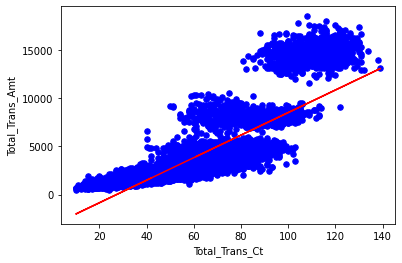

In [106]:
# estimating coefficients
x = df['Total_Trans_Ct']
# y = df['Total_Trans_Ct']
y = df['Total_Trans_Amt']
b = estimate_coef(x, y)

print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))

y_pred = b[0] + b[1]*x
# print(y_pred)

# plotting regression line
plot_regression_line(x, y, b)


R^2

In [97]:
x_bar = x.sum() / len(x)
y_bar = y_pred.sum() / len(x)
n = len(x)

sumX = x.sum()
sumY = y_pred.sum()
sumXY = (x * y_pred).sum()

SSxy = (x * y).sum() - ((x.sum() * y.sum()) / len(x))
SSyy = (y * y).sum() - ((y.sum() * y.sum()) / len(x))
SSxx = (x * x).sum() - ((x.sum() * x.sum()) / len(x))
# SSxy = (x * y_pred).sum() - (n * x_bar * y_bar)
# SSyy = (y_pred * y_pred).sum() - (n * y_bar * y_bar)
# SSxx = (x * x).sum() - (n * x_bar * x_bar)
b = SSxy / SSxx

print(b * SSxy / SSyy)


0.6515589808047227


In [93]:
# regr = linear_model.LinearRegression()
score = r2_score(y,y_pred)
print('r2 socre is',score)

r2 socre is 0.6515589808047233


In [94]:
corr_matrix = np.corrcoef(y, y_pred)
corr = corr_matrix[0, 1]
R_sq = corr**2

print(R_sq)


0.6515589808047229


Outline

In [108]:
def fs(df):
    return df.quantile(q=0.75)-df.quantile(q=0.25)
def ub(df):
    return df.quantile(q=0.5)+(fs(df)*1.5)
def lb(df):
    return df.quantile(q=0.5)-(fs(df)*1.5)


df_clean = df[(df['Total_Trans_Amt'] <= ub(df['Total_Trans_Amt']))
              & (df['Total_Trans_Amt'] >= lb(df['Total_Trans_Amt']))]
df_clean = df_clean[(df['Customer_Age'] <= ub(df['Customer_Age'])) & (
    df['Customer_Age'] >= lb(df['Customer_Age']))]
df_clean = df_clean[(df['Total_Trans_Ct'] <= ub(df['Total_Trans_Ct'])) & (
    df['Total_Trans_Ct'] >= lb(df['Total_Trans_Ct']))]


/var/folders/9y/rqqys4kj4mz3ffxmf29_lf240000gn/T/ipykernel_51658/2891365405.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[(df['Customer_Age'] <= ub(df['Customer_Age'])) & (
/var/folders/9y/rqqys4kj4mz3ffxmf29_lf240000gn/T/ipykernel_51658/2891365405.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[(df['Total_Trans_Ct'] <= ub(df['Total_Trans_Ct'])) & (


Estimated coefficients:
b_0 = -473.2668620999061            
b_1 = 63.638090033724524


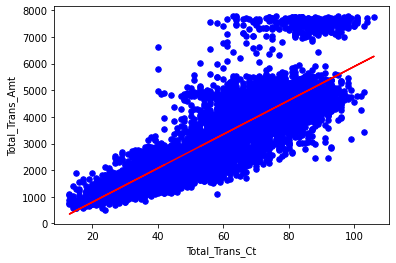

In [111]:
x_out = df_clean['Total_Trans_Ct']
# y = df['Total_Trans_Ct']
y_out = df_clean['Total_Trans_Amt']
b = estimate_coef(x_out, y_out)

print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))

y_out_pred = b[0] + b[1]*x_out
# print(y_pred)

# plotting regression line
plot_regression_line(x_out, y_out, b)


In [112]:
score = r2_score(y_out,y_out_pred)
print('r2 socre is',score)

r2 socre is 0.72326062245809
